Blurred Data Generation (Foams) for NN Training
===============================================

This example demonstrates how to generate blurred image data for
training neural network models for deconvolution (deblurring). Foam
phantoms from xdesign are used to generate the clean images.

In [1]:
# This scico project Jupyter notebook has been automatically modified
# to install the dependencies required for running it on Google Colab.
# If you encounter any problems in running it, please open an issue at
#   https://github.com/lanl/scico-data/issues

!pip install 'scico[examples] @ git+https://github.com/lanl/scico'

# isort: off
import numpy as np

import logging
import ray

ray.init(logging_level=logging.ERROR)  # need to call init before jax import: ray-project/ray#44087

from scico import plot
from scico.flax.examples import load_blur_data
plot.config_notebook_plotting()

Read data from cache or generate if not available.

In [2]:
n = 3  # convolution kernel size
σ = 20.0 / 255  # noise level
psf = np.ones((n, n)) / (n * n)  # kernel

train_nimg = 416  # number of training images
test_nimg = 64  # number of testing images
nimg = train_nimg + test_nimg
output_size = 256  # image size

train_ds, test_ds = load_blur_data(
    train_nimg,
    test_nimg,
    output_size,
    psf,
    σ,
    verbose=True,
)

Data read from path: ~/.cache/scico/examples/data
Set --training-- size: 416
Set --testing -- size: 64
Data range -- images --  Min:  0.00  Max:  1.00
Data range -- labels --  Min:  0.00  Max:  1.00


Plot randomly selected sample.

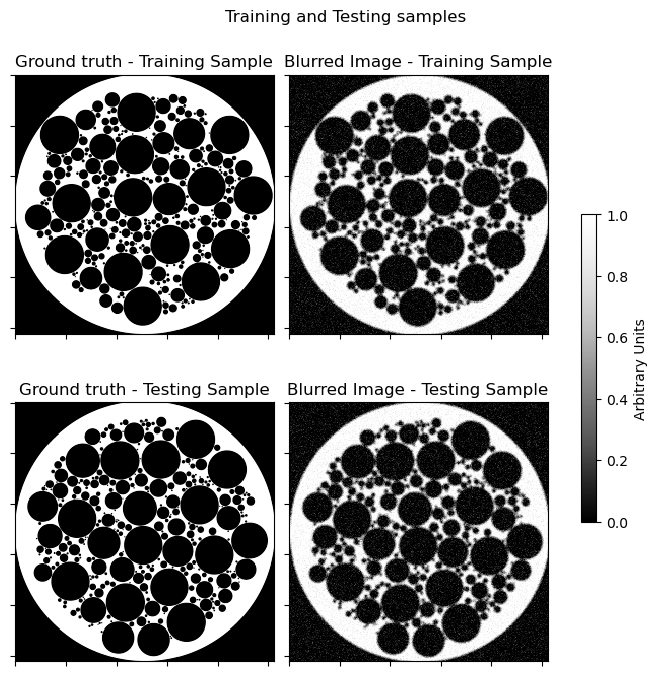

In [3]:
indx_tr = np.random.randint(0, train_nimg)
indx_te = np.random.randint(0, test_nimg)
fig, axes = plot.subplots(nrows=2, ncols=2, figsize=(7, 7))
plot.imview(
    train_ds["label"][indx_tr, ..., 0],
    title="Ground truth - Training Sample",
    fig=fig,
    ax=axes[0, 0],
)
plot.imview(
    train_ds["image"][indx_tr, ..., 0],
    title="Blurred Image - Training Sample",
    fig=fig,
    ax=axes[0, 1],
)
plot.imview(
    test_ds["label"][indx_te, ..., 0],
    title="Ground truth - Testing Sample",
    fig=fig,
    ax=axes[1, 0],
)
plot.imview(
    test_ds["image"][indx_te, ..., 0],
    title="Blurred Image - Testing Sample",
    fig=fig,
    ax=axes[1, 1],
)
fig.suptitle(r"Training and Testing samples")
fig.tight_layout()
fig.colorbar(
    axes[0, 1].get_images()[0],
    ax=axes,
    shrink=0.5,
    pad=0.05,
    label="Arbitrary Units",
)
fig.show()